<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [18]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [37]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [20]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [21]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


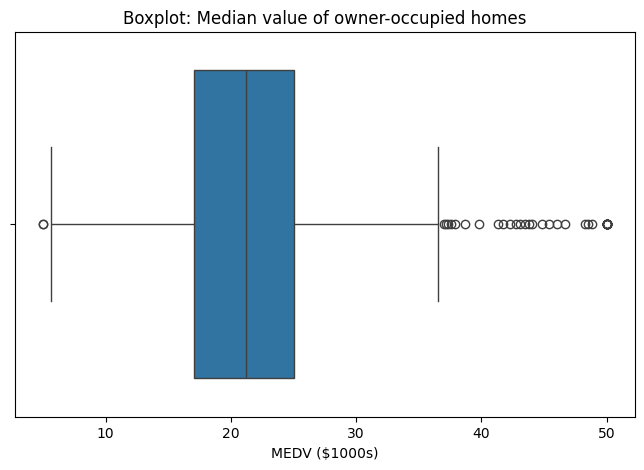

In [24]:
# Boxplot для MEDV
plt.figure(figsize=(8, 5))
sns.boxplot(x=boston_df["MEDV"])
plt.title("Boxplot: Median value of owner-occupied homes")
plt.xlabel("MEDV ($1000s)")
plt.show()

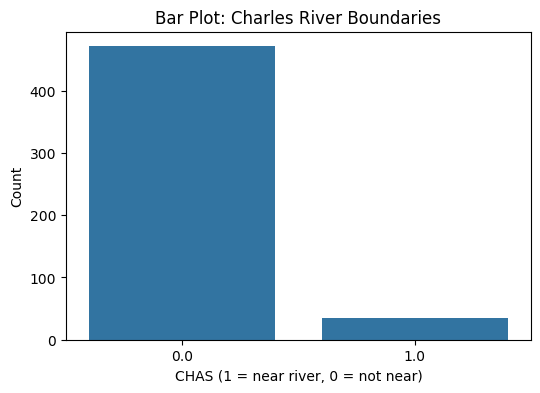

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x=boston_df["CHAS"])
plt.title("Bar Plot: Charles River Boundaries")
plt.xlabel("CHAS (1 = near river, 0 = not near)")
plt.ylabel("Count")
plt.show()

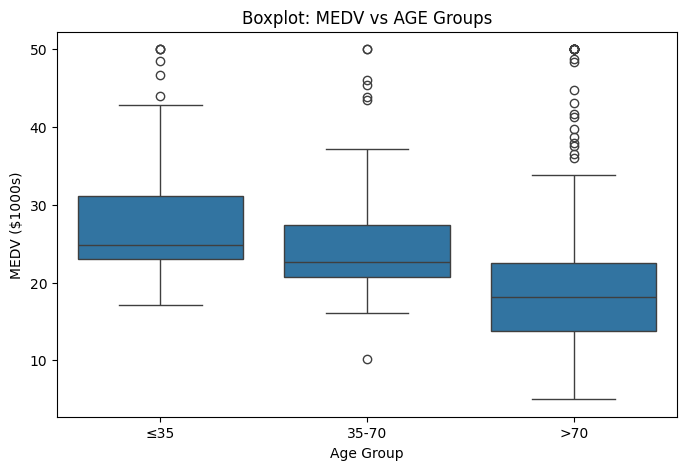

In [30]:
boston_df["AGE_Group"] = pd.cut(boston_df["AGE"], bins=[0, 35, 70, 100], labels=["≤35", "35-70", ">70"])
plt.figure(figsize=(8, 5))
sns.boxplot(x=boston_df["AGE_Group"], y=boston_df["MEDV"])
plt.title("Boxplot: MEDV vs AGE Groups")
plt.xlabel("Age Group")
plt.ylabel("MEDV ($1000s)")
plt.show()

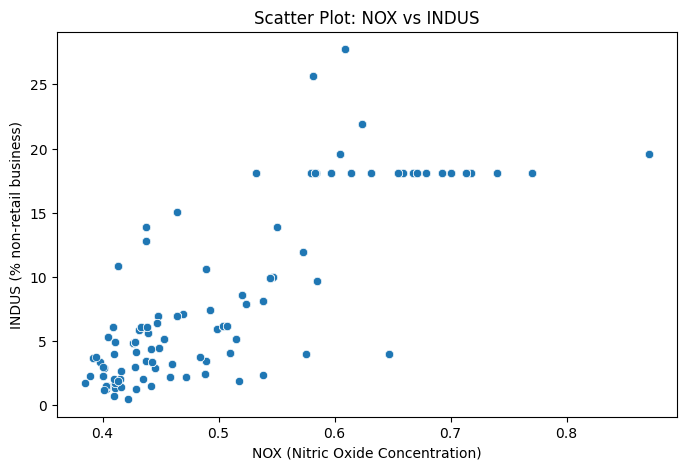

In [32]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=boston_df["NOX"], y=boston_df["INDUS"])
plt.title("Scatter Plot: NOX vs INDUS")
plt.xlabel("NOX (Nitric Oxide Concentration)")
plt.ylabel("INDUS (% non-retail business)")
plt.show()

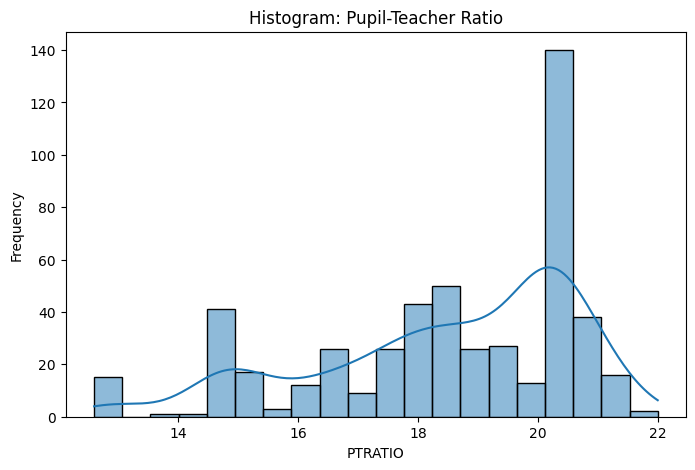

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(boston_df["PTRATIO"], bins=20, kde=True)
plt.title("Histogram: Pupil-Teacher Ratio")
plt.xlabel("PTRATIO")
plt.ylabel("Frequency")
plt.show()

In [38]:
medv_river = boston_df[boston_df["CHAS"] == 1]["MEDV"]
medv_no_river = boston_df[boston_df["CHAS"] == 0]["MEDV"]
t_stat, p_value = stats.ttest_ind(medv_river, medv_no_river)
print(f"T-test: t={t_stat:.2f}, p={p_value:.4f}")
if p_value < 0.05:
    print("Различие значимо, цены у реки и вдали разные.")
else:
    print("Различие незначимо, цены похожи.")

T-test: t=4.00, p=0.0001
Различие значимо, цены у реки и вдали разные.


In [41]:
anova_model = ols("MEDV ~ C(AGE_Group)", data=boston_df).fit()
anova_result = sm.stats.anova_lm(anova_model, typ=2)
print("\nANOVA Result:\n", anova_result)


ANOVA Result:
                     sum_sq     df         F        PR(>F)
C(AGE_Group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


In [44]:
corr_coef, p_value = stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])
print(f"\nPearson Correlation NOX vs INDUS: r={corr_coef:.2f}, p={p_value:.4f}")
if p_value < 0.05:
    print("Корреляция значима, связь есть.")
else:
    print("Связи нет.")


Pearson Correlation NOX vs INDUS: r=0.76, p=0.0000
Корреляция значима, связь есть.


In [47]:
regression_model = ols("MEDV ~ DIS", data=boston_df).fit()
print("\nRegression Summary:\n", regression_model.summary())


Regression Summary:
                             OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        20:56:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.8